In [223]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import warnings
warnings.filterwarnings('ignore')

**Задача 35.** *(Восстановление аплитуды и фазы квазипериодического сигнала по отсчетным данным)*

Зададим исходный сигнал:

In [224]:
a = 5
alpha = 0.2
f0 = 1


def U(x):
    return A(x)*np.cos(F(x))


def A(x):
    return np.exp(-(x/a)**10)


def F(x):
    return 2*np.pi*f0*(1-alpha*(x/a)**2)*x

Зададим равномерную сетку на отрезке $-\frac{L}{2} \le x \le \frac{L}{2}$, состоящую из N ячеек:

In [225]:
L = 16
N = 2048

x = np.linspace(-L/2, L/2, N)

Оцифрованный сигнал u = U(x):

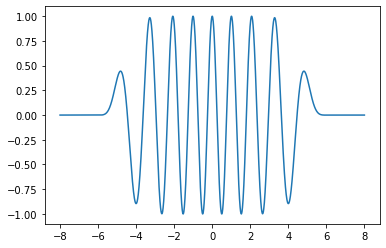

In [226]:
u = U(x)
plt.plot(x, u)

Вычислим дискретное преобразование Гильберта:
$$
\tilde u_j = \sum_{k=0}^{N-1} \tilde W_k exp(i 2\pi\frac{kj}{N}), j = 0, 1, ..., N-1, \text{где}
\\
\tilde W_k = -i s_k W_k,
\\
W_k = \frac{1}{N} \sum_{j=0}^{N-1} u_j exp(-i 2\pi\frac{kj}{N}), k = 0, 1, ..., N-1
$$

In [227]:
def s(k):
    if k == 0:
        return 0
    elif k < N//2:
        return 1
    return -1


W = fft(u)
W_hilb = [-1j*s(k)*W[k] for k in range(N)]
u_hilb = ifft(W_hilb)

u_hilb = np.array(u_hilb, dtype = float) # во время вычислений остаётся небольшая мнимая часть, которую можно отробсить

Рассчитаем амплитуду и фазу:

In [228]:
ampl = np.sqrt(u**2+u_hilb**2)
phase = np.arctan2(u_hilb, u)

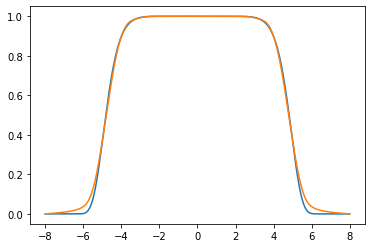

In [229]:
plt.plot(x, A(x))
plt.plot(x, ampl)

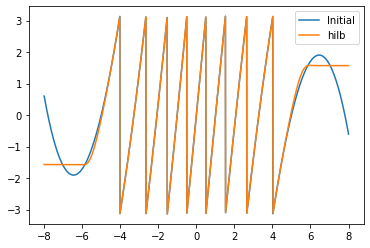

In [230]:
def PhaseCorrection(x):
    while x >= np.pi:
        x -= 2*np.pi
    
    while x < -np.pi:
        x += 2*np.pi
    
    return x


plt.plot(x, [PhaseCorrection(p) for p in F(x)], label = 'Initial')
plt.plot(x, phase, label = 'hilb')
plt.legend()